In [94]:
import pandas as pd

# Load dataset (replace with your actual file path)
# df = pd.read_csv('your_air_quality_data.csv', delimiter=';')

# Load the data with proper delimiter (semicolon in this case)
df = pd.read_csv('AirQuality.csv', delimiter=';', header=None)

# Check the first few rows to verify the data
print(df.head())


           0         1       2            3         4         5   \
0        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)   
1  10/03/2004  18.00.00     2,6         1360       150      11,9   
2  10/03/2004  19.00.00       2         1292       112       9,4   
3  10/03/2004  20.00.00     2,2         1402        88       9,0   
4  10/03/2004  21.00.00     2,2         1376        80       9,2   

              6        7             8        9             10           11  \
0  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   
1           1046      166          1056      113          1692         1268   
2            955      103          1174       92          1559          972   
3            939      131          1140      114          1555         1074   
4            948      172          1092      122          1584         1203   

     12    13      14  15  16  
0     T    RH      AH NaN NaN  
1  13,6  48,9  0,7578 NaN NaN  
2  13,3  47,7  0,725

In [96]:
# Set column names based on the first row (the first row of the dataframe)
df.columns = df.iloc[0]

# Drop the first row (now it's redundant)
df = df.drop(0)

# Reset the index after dropping the first row
df.reset_index(drop=True, inplace=True)

# Check the first few rows again to ensure the data looks correct
print(df.head())


0        Date      Time CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6        1360      150     11,9          1046   
1  10/03/2004  19.00.00      2        1292      112      9,4           955   
2  10/03/2004  20.00.00    2,2        1402       88      9,0           939   
3  10/03/2004  21.00.00    2,2        1376       80      9,2           948   
4  10/03/2004  22.00.00    1,6        1272       51      6,5           836   

0 NOx(GT) PT08.S3(NOx) NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH  \
0     166         1056     113         1692        1268  13,6  48,9  0,7578   
1     103         1174      92         1559         972  13,3  47,7  0,7255   
2     131         1140     114         1555        1074  11,9  54,0  0,7502   
3     172         1092     122         1584        1203  11,0  60,0  0,7867   
4     131         1205     116         1490        1110  11,2  59,6  0,7888   

0  NaN  NaN  
0  NaN  NaN  
1  NaN  NaN  
2  NaN  NaN  


In [98]:
# Combine 'Date' and 'Time' columns into one datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Drop the original 'Date' and 'Time' columns (they're now combined into 'DateTime')
df = df.drop(['Date', 'Time'], axis=1)

# Check the first few rows
print(df.head())


C:\Users\Neha\AppData\Local\Temp\ipykernel_21748\2136433271.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


0 CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC) NOx(GT) PT08.S3(NOx)  \
0    2,6        1360      150     11,9          1046     166         1056   
1      2        1292      112      9,4           955     103         1174   
2    2,2        1402       88      9,0           939     131         1140   
3    2,2        1376       80      9,2           948     172         1092   
4    1,6        1272       51      6,5           836     131         1205   

0 NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH  NaN  NaN DateTime  
0     113         1692        1268  13,6  48,9  0,7578  NaN  NaN      NaT  
1      92         1559         972  13,3  47,7  0,7255  NaN  NaN      NaT  
2     114         1555        1074  11,9  54,0  0,7502  NaN  NaN      NaT  
3     122         1584        1203  11,0  60,0  0,7867  NaN  NaN      NaT  
4     116         1490        1110  11,2  59,6  0,7888  NaN  NaN      NaT  


In [132]:
# Check the first few rows of the 'DateTime' column again
print(df['DateTime'].head(10))


0   2024-01-01
1   2024-01-01
2   2024-01-01
3   2024-01-01
4   2024-01-01
5   2024-01-01
6   2024-01-01
7   2024-01-01
8   2024-01-01
9   2024-01-01
Name: DateTime, dtype: datetime64[ns]


In [134]:
# Check the shape of the dataframe
print(df.shape)

# Ensure there are no NaT values in the DateTime column
print(df['DateTime'].isnull().sum())


(9471, 16)
0


In [136]:
# Handling missing values (example: forward fill)
df.fillna(method='ffill', inplace=True)


C:\Users\Neha\AppData\Local\Temp\ipykernel_21748\2363909948.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [151]:
# Print the column names of the DataFrame to inspect any discrepancies
print(df.columns)

# Optionally, rename columns to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

# Now try to apply numeric conversion to the proper columns
numeric_columns = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Check if the columns exist in the DataFrame
existing_columns = [col for col in numeric_columns if col in df.columns]
print(f"Existing columns: {existing_columns}")

# Apply numeric conversion only to existing columns
df[existing_columns] = df[existing_columns].apply(pd.to_numeric, errors='coerce')

# Check the first few rows to verify the data conversion
print(df.head())


Index(['10/03/2004;18.00.00;2', '6;1360;150;11',
       '9;1046;166;1056;113;1692;1268;13', '6;48', '9;0', '7578;;'],
      dtype='object')
Existing columns: []
              10/03/2004;18.00.00;2                  6;1360;150;11  \
0  10/03/2004;19.00.00;2;1292;112;9  4;955;103;1174;92;1559;972;13   
1             10/03/2004;20.00.00;2                    2;1402;88;9   
2             10/03/2004;21.00.00;2                    2;1376;80;9   
3             10/03/2004;22.00.00;1                    6;1272;51;6   
4             10/03/2004;23.00.00;1                    2;1197;38;4   

  9;1046;166;1056;113;1692;1268;13  6;48     9;0  7578;;  
0                             3;47   7;0  7255;;     NaN  
1  0;939;131;1140;114;1555;1074;11  9;54     0;0  7502;;  
2  2;948;172;1092;122;1584;1203;11  0;60     0;0  7867;;  
3  5;836;131;1205;116;1490;1110;11  2;59     6;0  7888;;  
4     7;750;89;1337;96;1393;949;11  2;59     2;0  7848;;  


In [153]:
# Reload the data with the correct delimiter (semicolon)
df = pd.read_csv('AirQuality.csv', delimiter=';')

# Now inspect the first few rows to see if the data is correctly split
print(df.head())

# Check the column names to ensure proper formatting
print(df.columns)

# Now you can proceed with the numeric conversion as before
numeric_columns = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Convert to numeric only if the columns exist
existing_columns = [col for col in numeric_columns if col in df.columns]
print(f"Existing columns: {existing_columns}")

# Apply numeric conversion to the existing columns
df[existing_columns] = df[existing_columns].apply(pd.to_numeric, errors='coerce')

# Verify the conversion
print(df.head())


         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [157]:
# Drop the columns that contain only NaN values (Unnamed columns)
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Handle missing values (choose one approach)
# Option 1: Drop rows with any NaN values
df = df.dropna()

# Option 2: Fill missing values with a default value (e.g., mean or 0)
# Example: Fill with 0
# df = df.fillna(0)

# Or, if you prefer to fill with the column mean (useful for numerical columns):
# df = df.fillna(df.mean())

# Check the data after cleaning
print(df.head())

# Verify that missing values have been handled
print(df.isnull().sum())


Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [161]:
# Fill missing values with the mean of each column
df = df.fillna(df.mean())

# Check the cleaned data
print(df.head())

# Verify that there are no more missing values
print(df.isnull().sum())


Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [165]:
# Display the first few rows of the raw data
print(df.head())

# Check for missing values across all columns
print(df.isnull().sum())

# Check the number of rows and columns in the dataset
print(df.shape)


Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
(0, 15)


In [167]:
# Check missing values in each column
missing_per_column = df.isnull().sum()
print(missing_per_column)


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [169]:
# Fill missing values in selected columns (e.g., CO(GT) and PT08.S1(CO)) with 0
df[['CO(GT)', 'PT08.S1(CO)']] = df[['CO(GT)', 'PT08.S1(CO)']].fillna(0)

# Alternatively, fill missing values in continuous columns with their column mean
df = df.fillna(df.mean())

# Verify the changes
print(df.head())
print(df.isnull().sum())


Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [171]:
# Drop rows that are entirely empty (if any)
df_cleaned = df.dropna(how='all')

# Check the resulting dataset
print(df_cleaned.shape)
print(df_cleaned.head())


(0, 15)
Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []


In [185]:
print(df.columns)

Index(['Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;'], dtype='object')


In [191]:
import pandas as pd

# Load the dataset with proper delimiter and header row
df = pd.read_csv('AirQuality.csv', delimiter=';', header=0)

# Check the column names and ensure they are correct
print(df.columns)

# If the columns still appear incorrect, split the first row manually
if len(df.columns) == 1:  # If columns are still not separated
    df.columns = df.columns[0].split(';')

# Drop any extra columns (if there's an empty column at the end)
df = df.dropna(axis=1, how='all')

# Check the first few rows of the dataset
print(df.head())


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        15

In [195]:
import pandas as pd

# Load the dataset with the correct delimiter
df = pd.read_csv('AirQuality.csv', delimiter=';', header=0)

# Convert relevant columns to string, replace commas with periods, and then convert them to float
cols_to_clean = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Drop unnecessary columns (Unnamed columns)
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Handle missing values by forward filling or interpolation
df = df.fillna(method='ffill')  # Or use df.interpolate() for linear interpolation

# Convert 'Date' and 'Time' columns to a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# Drop original 'Date' and 'Time' columns as they're no longer needed
df = df.drop(columns=['Date', 'Time'])

# Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Check the cleaned dataset with datetime index
print(df.head())


                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                      
2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0    

C:\Users\Neha\AppData\Local\Temp\ipykernel_21748\67597920.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Or use df.interpolate() for linear interpolation


In [197]:
import pandas as pd

# Load the dataset with the correct delimiter
df = pd.read_csv('AirQuality.csv', delimiter=';', header=0)

# Convert relevant columns to string, replace commas with periods, and then convert them to float
cols_to_clean = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Drop unnecessary columns (Unnamed columns)
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Handle missing values by forward filling
df = df.ffill()  # Forward fill missing values

# Convert 'Date' and 'Time' columns to a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# Drop original 'Date' and 'Time' columns as they're no longer needed
df = df.drop(columns=['Date', 'Time'])

# Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Check the cleaned dataset with datetime index
print(df.head())


                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                      
2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0    

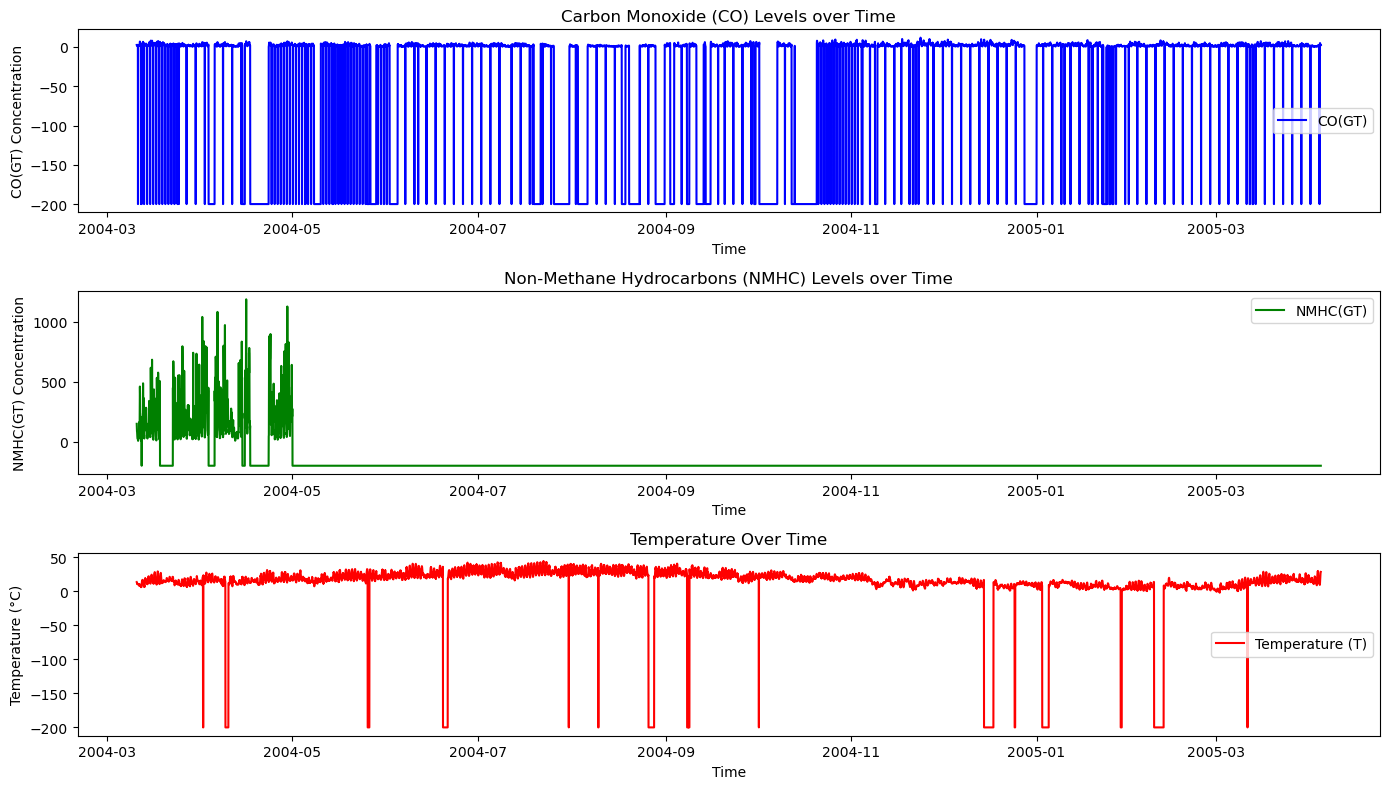

In [199]:
import matplotlib.pyplot as plt

# Plot the trends for selected pollutants and temperature
plt.figure(figsize=(14, 8))

# Plot CO(GT) over time
plt.subplot(3, 1, 1)
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', color='b')
plt.xlabel('Time')
plt.ylabel('CO(GT) Concentration')
plt.title('Carbon Monoxide (CO) Levels over Time')
plt.legend()

# Plot NMHC(GT) over time
plt.subplot(3, 1, 2)
plt.plot(df.index, df['NMHC(GT)'], label='NMHC(GT)', color='g')
plt.xlabel('Time')
plt.ylabel('NMHC(GT) Concentration')
plt.title('Non-Methane Hydrocarbons (NMHC) Levels over Time')
plt.legend()

# Plot Temperature (T) over time
plt.subplot(3, 1, 3)
plt.plot(df.index, df['T'], label='Temperature (T)', color='r')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()


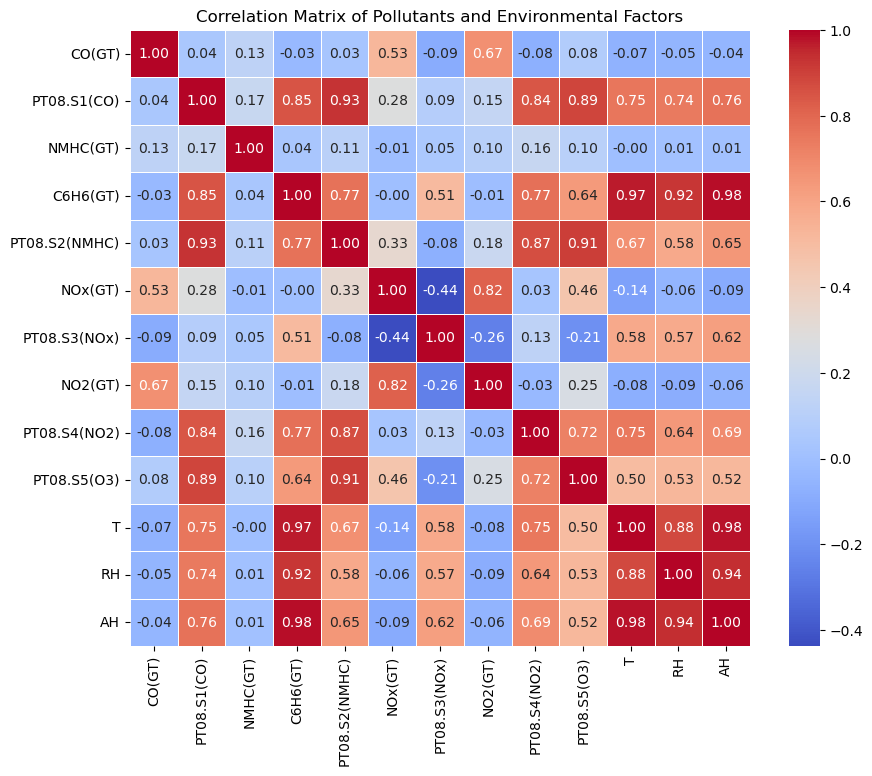

In [201]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Pollutants and Environmental Factors')
plt.show()


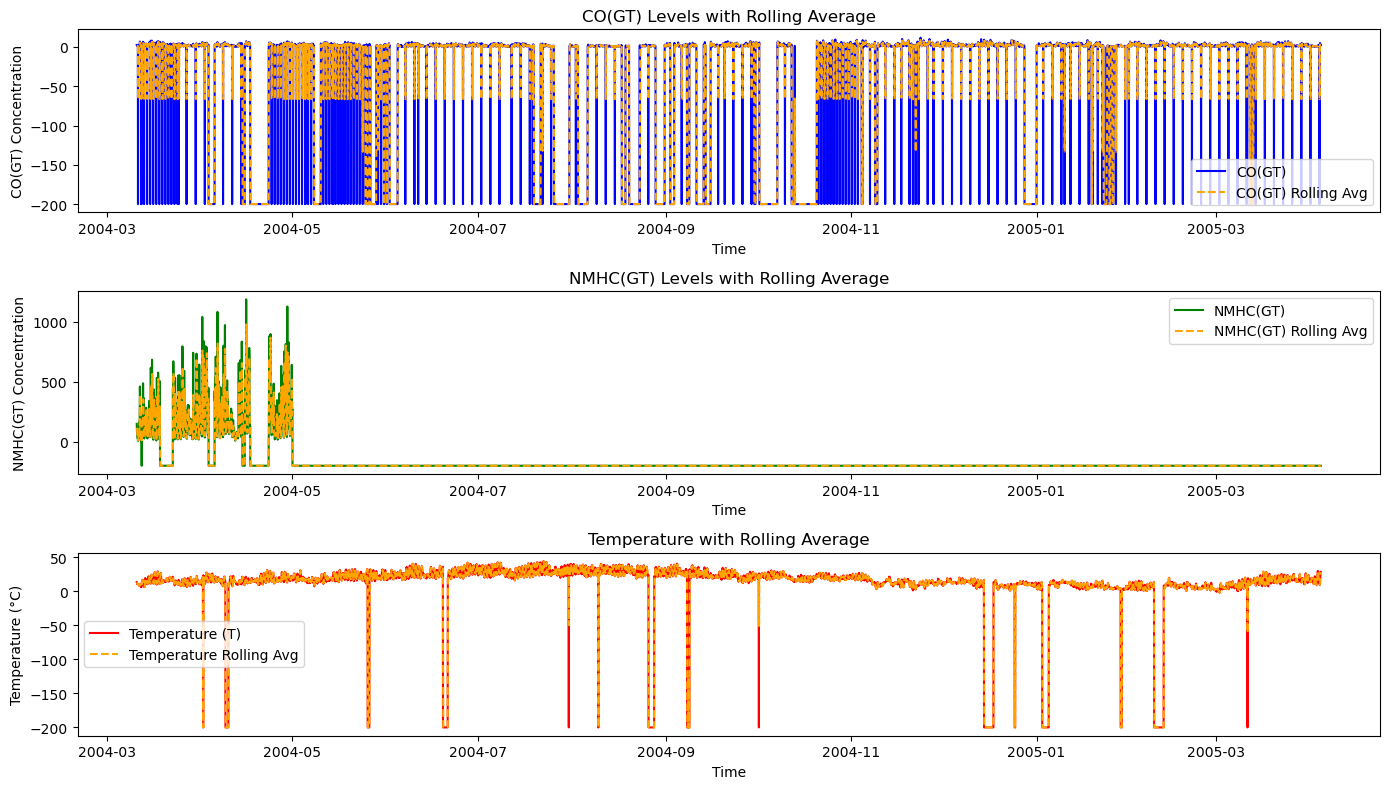

In [203]:
# Create a 3-hour rolling average for some of the pollutants and temperature
df['CO(GT)_rolling'] = df['CO(GT)'].rolling(window=3).mean()
df['NMHC(GT)_rolling'] = df['NMHC(GT)'].rolling(window=3).mean()
df['T_rolling'] = df['T'].rolling(window=3).mean()

# Plot the rolling averages
plt.figure(figsize=(14, 8))

# Plot CO(GT) and its rolling average
plt.subplot(3, 1, 1)
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', color='b')
plt.plot(df.index, df['CO(GT)_rolling'], label='CO(GT) Rolling Avg', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('CO(GT) Concentration')
plt.title('CO(GT) Levels with Rolling Average')
plt.legend()

# Plot NMHC(GT) and its rolling average
plt.subplot(3, 1, 2)
plt.plot(df.index, df['NMHC(GT)'], label='NMHC(GT)', color='g')
plt.plot(df.index, df['NMHC(GT)_rolling'], label='NMHC(GT) Rolling Avg', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('NMHC(GT) Concentration')
plt.title('NMHC(GT) Levels with Rolling Average')
plt.legend()

# Plot Temperature (T) and its rolling average
plt.subplot(3, 1, 3)
plt.plot(df.index, df['T'], label='Temperature (T)', color='r')
plt.plot(df.index, df['T_rolling'], label='Temperature Rolling Avg', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature with Rolling Average')
plt.legend()

plt.tight_layout()
plt.show()


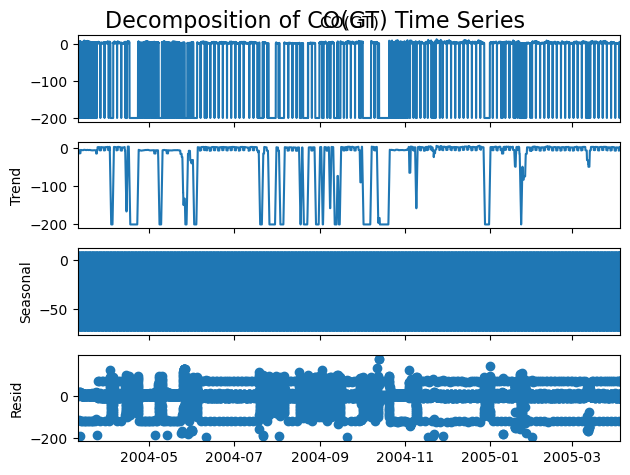

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose CO(GT) time series
decomposition = seasonal_decompose(df['CO(GT)'].dropna(), model='additive', period=24)  # Daily period
fig = decomposition.plot()
plt.suptitle('Decomposition of CO(GT) Time Series', fontsize=16)
plt.show()


In [207]:
# Fill missing values using forward-fill
df = df.fillna(method='ffill')  # Or use df.interpolate() for linear interpolation

# Check if there are still any missing values
print(df.isnull().sum())


CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
CO(GT)_rolling      2
NMHC(GT)_rolling    2
T_rolling           2
dtype: int64


C:\Users\Neha\AppData\Local\Temp\ipykernel_21748\149732976.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Or use df.interpolate() for linear interpolation


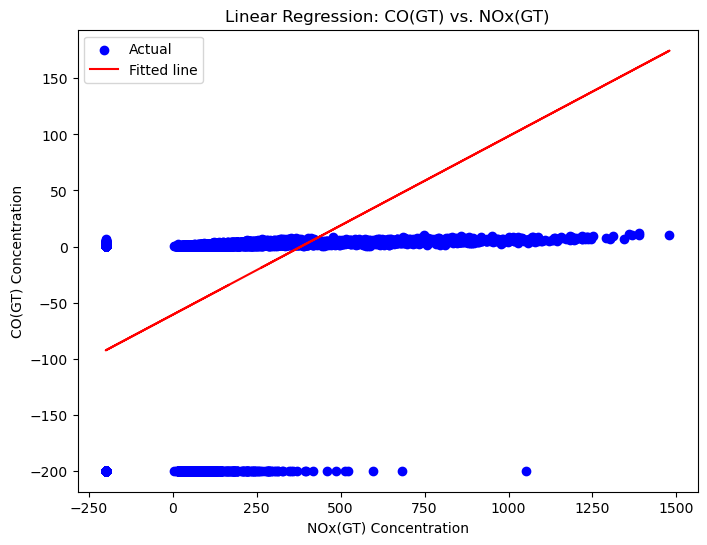

In [209]:
from sklearn.linear_model import LinearRegression

# Define X and y
X = df[['NOx(GT)']]  # Independent variable
y = df['CO(GT)']  # Dependent variable

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict CO(GT) values
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('NOx(GT) Concentration')
plt.ylabel('CO(GT) Concentration')
plt.title('Linear Regression: CO(GT) vs. NOx(GT)')
plt.legend()
plt.show()


In [215]:
# Calculate the moving average for each feature
df['CO(GT)_MA'] = df['CO(GT)'].rolling(window=3).mean()  # 3-hour moving average
df['PT08.S1(CO)_MA'] = df['PT08.S1(CO)'].rolling(window=3).mean()
df['NMHC(GT)_MA'] = df['NMHC(GT)'].rolling(window=3).mean()
df['C6H6(GT)_MA'] = df['C6H6(GT)'].rolling(window=3).mean()
df['NOx(GT)_MA'] = df['NOx(GT)'].rolling(window=3).mean()
df['PT08.S3(NOx)_MA'] = df['PT08.S3(NOx)'].rolling(window=3).mean()
df['NO2(GT)_MA'] = df['NO2(GT)'].rolling(window=3).mean()
df['PT08.S4(NO2)_MA'] = df['PT08.S4(NO2)'].rolling(window=3).mean()
df['PT08.S5(O3)_MA'] = df['PT08.S5(O3)'].rolling(window=3).mean()
df['T_MA'] = df['T'].rolling(window=3).mean()
df['RH_MA'] = df['RH'].rolling(window=3).mean()
df['AH_MA'] = df['AH'].rolling(window=3).mean()

# Rolling statistics (e.g., standard deviation over a 3-hour window)
df['CO(GT)_STD'] = df['CO(GT)'].rolling(window=3).std()
df['PT08.S1(CO)_STD'] = df['PT08.S1(CO)'].rolling(window=3).std()
df['NMHC(GT)_STD'] = df['NMHC(GT)'].rolling(window=3).std()
df['C6H6(GT)_STD'] = df['C6H6(GT)'].rolling(window=3).std()
df['NOx(GT)_STD'] = df['NOx(GT)'].rolling(window=3).std()
df['PT08.S3(NOx)_STD'] = df['PT08.S3(NOx)'].rolling(window=3).std()
df['NO2(GT)_STD'] = df['NO2(GT)'].rolling(window=3).std()
df['PT08.S4(NO2)_STD'] = df['PT08.S4(NO2)'].rolling(window=3).std()
df['PT08.S5(O3)_STD'] = df['PT08.S5(O3)'].rolling(window=3).std()
df['T_STD'] = df['T'].rolling(window=3).std()
df['RH_STD'] = df['RH'].rolling(window=3).std()
df['AH_STD'] = df['AH'].rolling(window=3).std()


In [217]:
# Create lag features for the target variable and relevant features
df['CO(GT)_Lag1'] = df['CO(GT)'].shift(1)
df['PT08.S1(CO)_Lag1'] = df['PT08.S1(CO)'].shift(1)
df['NMHC(GT)_Lag1'] = df['NMHC(GT)'].shift(1)
df['C6H6(GT)_Lag1'] = df['C6H6(GT)'].shift(1)
df['NOx(GT)_Lag1'] = df['NOx(GT)'].shift(1)
df['PT08.S3(NOx)_Lag1'] = df['PT08.S3(NOx)'].shift(1)
df['NO2(GT)_Lag1'] = df['NO2(GT)'].shift(1)
df['PT08.S4(NO2)_Lag1'] = df['PT08.S4(NO2)'].shift(1)
df['PT08.S5(O3)_Lag1'] = df['PT08.S5(O3)'].shift(1)
df['T_Lag1'] = df['T'].shift(1)
df['RH_Lag1'] = df['RH'].shift(1)
df['AH_Lag1'] = df['AH'].shift(1)

# You can also create more lags (Lag2, Lag3, etc.) if needed
df['CO(GT)_Lag2'] = df['CO(GT)'].shift(2)
df['PT08.S1(CO)_Lag2'] = df['PT08.S1(CO)'].shift(2)


In [219]:
# Drop rows with NaN values (created by lag or rolling statistics)
df = df.dropna()

# Now the DataFrame `df` has the extracted features.


In [221]:
# Preview the first few rows of the data
df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,NOx(GT)_Lag1,PT08.S3(NOx)_Lag1,NO2(GT)_Lag1,PT08.S4(NO2)_Lag1,PT08.S5(O3)_Lag1,T_Lag1,RH_Lag1,AH_Lag1,CO(GT)_Lag2,PT08.S1(CO)_Lag2
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2.6,1360.0
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2.0,1292.0
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2.2,1402.0
2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,...,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2.2,1376.0
2004-03-11 00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,...,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,1.6,1272.0


In [223]:
# Drop rows with NaN values (rows that have missing values due to lagging or rolling operations)
df_cleaned = df.dropna()


In [225]:
from sklearn.preprocessing import StandardScaler

# Scale features to have mean=0 and variance=1
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
scaled_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                  'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                  'T', 'RH', 'AH', 'CO(GT)_Lag1', 'PT08.S1(CO)_Lag1', 'NMHC(GT)_Lag1', 
                  'C6H6(GT)_Lag1', 'NOx(GT)_Lag1', 'PT08.S3(NOx)_Lag1', 'NO2(GT)_Lag1', 
                  'PT08.S4(NO2)_Lag1', 'PT08.S5(O3)_Lag1', 'T_Lag1', 'RH_Lag1', 'AH_Lag1', 
                  'CO(GT)_Lag2', 'PT08.S1(CO)_Lag2']

df_scaled[scaled_columns] = scaler.fit_transform(df_scaled[scaled_columns])


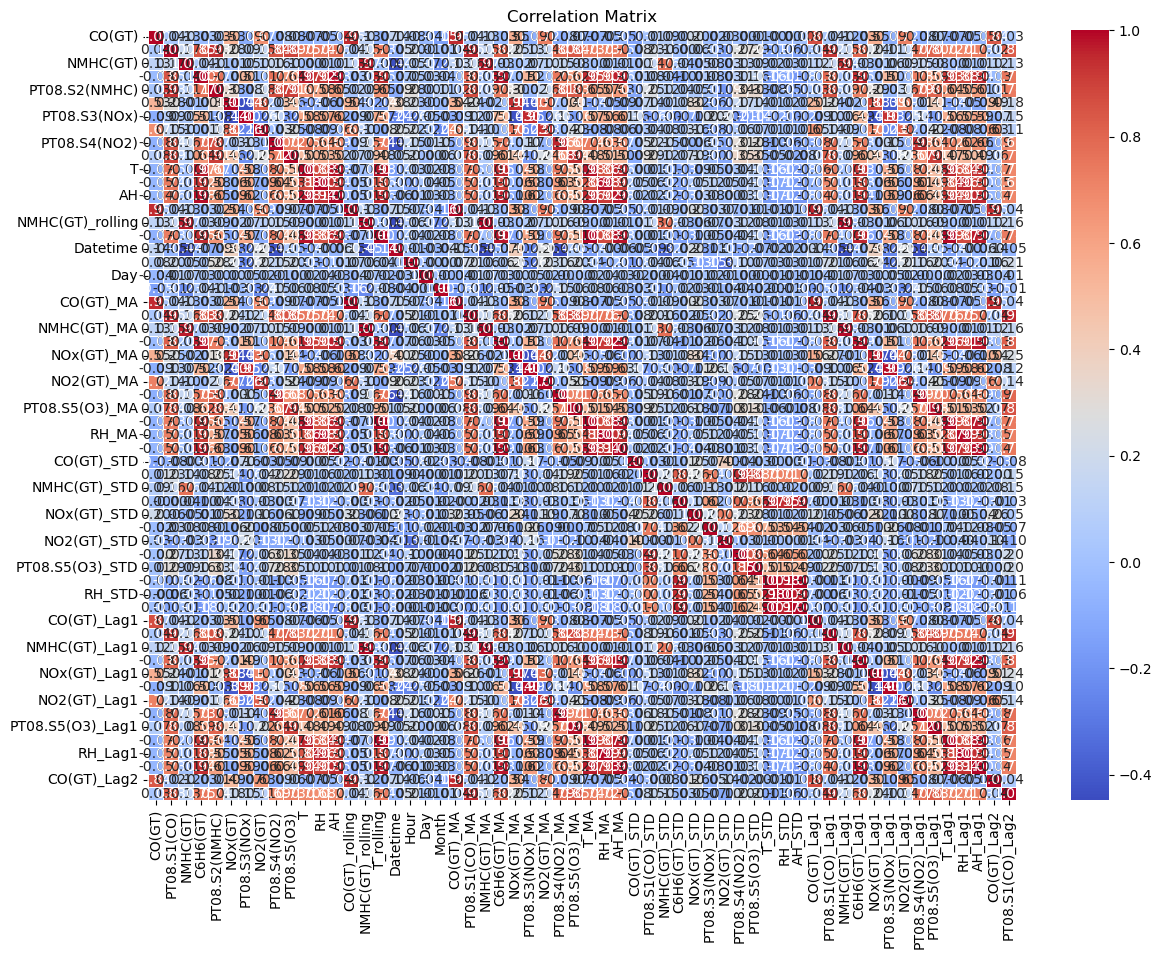

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_scaled.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# We need to create a time series for ARIMA
# We'll use the target variable 'CO(GT)' for ARIMA
df_target = df[target_col]

# Split data for ARIMA (training on the same time period)
train_size = int(len(df_target) * 0.8)
train, test = df_target[:train_size], df_target[train_size:]

# Train ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # (p, d, q)
arima_model_fit = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(test))

# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA RMSE: {arima_rmse}")


In [ ]:
import matplotlib.pyplot as plt

# Plotting ARIMA results
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='True CO(GT)', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs True CO(GT)')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

# Plotting LSTM results
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True CO(GT)', color='blue')
plt.plot(y_pred_lstm, label='LSTM Forecast', color='green')
plt.title('LSTM Forecast vs True CO(GT)')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()


In [ ]:
print(f"LSTM RMSE: {lstm_rmse}")
print(f"ARIMA RMSE: {arima_rmse}")


In [ ]:
pip install tensorflow


In [ ]:
!pip install tensorflow


In [250]:
print(scaled_df.index.duplicated().sum())
print(df[datetime_cols].index.duplicated().sum())


0
114


In [252]:
scaled_df = scaled_df.reset_index(drop=True)
df[datetime_cols] = df[datetime_cols].reset_index(drop=True)



In [254]:
scaled_df = scaled_df.reset_index(drop=True)
df[datetime_cols] = df[datetime_cols].reset_index(drop=True)


In [262]:
df[datetime_cols] = df[datetime_cols].apply(lambda x: x.view('int64') / 10**9)


C:\Users\Neha\AppData\Local\Temp\ipykernel_21748\1089920448.py:1: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df[datetime_cols] = df[datetime_cols].apply(lambda x: x.view('int64') / 10**9)


In [264]:
df[datetime_cols] = df[datetime_cols].apply(lambda x: x.view('int64') / 10**9)


C:\Users\Neha\AppData\Local\Temp\ipykernel_21748\1089920448.py:1: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df[datetime_cols] = df[datetime_cols].apply(lambda x: x.view('int64') / 10**9)


In [266]:
pip install pandas numpy scikit-learn matplotlib seaborn tensorflow


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [276]:
import pandas as pd

# Load the dataset, assuming it's in a file called 'air_quality.csv'
df = pd.read_csv('AirQuality.csv', delimiter=';')

# Display the first few rows of the data to check its structure
print(df.head())


         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [278]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop rows with missing data (you can adjust based on your needs)
df = df.dropna()  # or df.fillna(df.mean(), inplace=True)


Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [282]:
print(df.columns)


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [284]:
# Combine 'Date' and 'Time' columns into one column called 'Timestamp'
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')


In [286]:
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [288]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with median or drop)
df.fillna(df.median(), inplace=True)
# Or you can drop rows with missing values
# df.dropna(inplace=True)


CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Unnamed: 15      0
Unnamed: 16      0
Timestamp        0
dtype: int64


In [290]:
X = df.drop('CO(GT)', axis=1)  # Features
y = df['CO(GT)']  # Target variable


In [294]:
print(X.shape)  # Check the number of rows and columns in X (features)
print(y.shape)  # Check the number of rows in y (target)


(0, 15)
(0,)


In [296]:
print(X.columns)
print(X.head())


Index(['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'Unnamed: 15', 'Unnamed: 16', 'Timestamp'],
      dtype='object')
Empty DataFrame
Columns: [PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH, Unnamed: 15, Unnamed: 16, Timestamp]
Index: []


In [298]:
print(y.isnull().sum())  # Check for missing values in the target column


0


In [300]:
y.dropna(inplace=True)  # Remove rows with missing target values


In [302]:
# Ensure the correct splitting of data
X = df.drop('CO(GT)', axis=1)  # Features
y = df['CO(GT)']  # Target variable


In [306]:
df = pd.read_csv('AirQuality.csv')  # Ensure the file path is correct
print(df.shape)  # Check the shape of the DataFrame
print(df.head())  # Check the first few rows


(9471, 1)
                                                                                                            Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9              

In [308]:
import pandas as pd

# Specify the delimiter as semicolon
df = pd.read_csv('AirQuality.csv', delimiter=';')

# Check the shape of the DataFrame
print(f"DataFrame Shape: {df.shape}")

# Print the first few rows to ensure data is loaded correctly
print(df.head())


DataFrame Shape: (9471, 17)
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unna

In [310]:
# Convert commas in numeric columns to proper decimal points
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.').astype(float)
df['T'] = df['T'].str.replace(',', '.').astype(float)
df['RH'] = df['RH'].str.replace(',', '.').astype(float)
df['AH'] = df['AH'].str.replace(',', '.').astype(float)

# Drop the unwanted unnamed columns
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Combine Date and Time columns to create a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# Drop the original Date and Time columns
df = df.drop(columns=['Date', 'Time'])

# Check the cleaned DataFrame
print(df.head())


   CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0     11,9         1046.0    166.0   
1     2.0       1292.0     112.0      9,4          955.0    103.0   
2     2.2       1402.0      88.0      9,0          939.0    131.0   
3     2.2       1376.0      80.0      9,2          948.0    172.0   
4     1.6       1272.0      51.0      6,5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   

             Datetime  
0 2004-03-10 18:00:00  
1 2004-03-10 19:00:00  
2 2004-03-10 20:00:00  
3 2004-03-10 21:00:00  
4 2004-03-10 2

In [312]:
# Check the first few rows after cleaning
print(df.head())

# Check the data types of the columns
print(df.dtypes)


   CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0     11,9         1046.0    166.0   
1     2.0       1292.0     112.0      9,4          955.0    103.0   
2     2.2       1402.0      88.0      9,0          939.0    131.0   
3     2.2       1376.0      80.0      9,2          948.0    172.0   
4     1.6       1272.0      51.0      6,5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   

             Datetime  
0 2004-03-10 18:00:00  
1 2004-03-10 19:00:00  
2 2004-03-10 20:00:00  
3 2004-03-10 21:00:00  
4 2004-03-10 2

In [314]:
# Check for missing values
print(df.isnull().sum())


CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
Datetime         114
dtype: int64


In [326]:
# Check for missing values in X_train
print(X_train.isnull().sum())



PT08.S1(CO)      92
NMHC(GT)         92
C6H6(GT)         92
PT08.S2(NMHC)    92
NOx(GT)          92
PT08.S3(NOx)     92
NO2(GT)          92
PT08.S4(NO2)     92
PT08.S5(O3)      92
T                92
RH               92
AH               92
dtype: int64


In [328]:
# Fill missing values (example with the median)
X_train = X_train.fillna(X_train.median())

# Or drop rows with missing values
X_train = X_train.dropna()


In [330]:
import numpy as np

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs after replacing infinity
X_train = X_train.fillna(X_train.median())


In [332]:
print(X_train.shape)
print(y_train.shape)


(7576, 12)
(7576,)


In [334]:
model = RandomForestRegressor(random_state=42)


In [336]:
# Check the first few rows of X_train to ensure it contains only numeric data
print(X_train.head())


      PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
7563       1016.0    -200.0       7.8          892.0    317.0         758.0   
3991        919.0    -200.0       5.7          799.0     29.0         844.0   
5712       1333.0    -200.0      20.5         1312.0    383.0         520.0   
472        1565.0     735.0      21.0         1324.0    320.0         695.0   
4246       1130.0    -200.0      13.9         1113.0   -200.0         674.0   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
7563    141.0        1109.0        945.0   9.2  49.8  0.5808  
3991     50.0        1409.0        881.0  22.2  43.1  1.1396  
5712    107.0        1853.0       1364.0  23.8  51.4  1.4956  
472     159.0        1872.0       1688.0  17.9  28.2  0.5741  
4246   -200.0        1623.0       1127.0  38.8  17.6  1.1979  


In [338]:
# Check for NaN values in X_train and y_train
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check for infinite values in X_train and y_train
import numpy as np
print(np.isinf(X_train).sum())
print(np.isinf(y_train).sum())


PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
92
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
0


In [340]:
# Fill NaN values with the median for X_train and y_train
X_train = X_train.fillna(X_train.median())
y_train = y_train.fillna(y_train.median())

# Replace infinite values with NaN and then fill them
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# After replacing, fill NaN values again
X_train = X_train.fillna(X_train.median())
y_train = y_train.fillna(y_train.median())


In [342]:
# Check the types of all columns in X_train
print(X_train.dtypes)


PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [344]:
# Convert any non-numeric columns to numeric if needed
X_train['C6H6(GT)'] = pd.to_numeric(X_train['C6H6(GT)'], errors='coerce')


In [346]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [347]:
y_train = y_train.values.ravel()  # Ensure y_train is 1D


In [352]:
# Try fitting the model with a smaller subset of data
X_train_subset = X_train.head(100)  # First 100 rows
y_train_subset = y_train[:100]  # First 100 rows using slicing

# Train the model with the subset
model.fit(X_train_subset, y_train_subset)


RandomForestRegressor(random_state=42)

In [354]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and 'AQI' is the target variable (replace it with your actual target column)

# Extract the relevant columns (e.g., 'AQI' and features)
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Ensure the 'Datetime' is in the correct format
df = df.set_index('Datetime')

# Scale the features and target for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling AQI (target variable) and features
scaled_data = scaler.fit_transform(df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                                      'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                                      'T', 'RH', 'AH']].values)

# Create time-series data (input X and target y)
# Use the last 60 time steps as the input (you can adjust this number)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :-1])  # Last column is the target variable
        y.append(data[i + time_step, -1])  # Target is the last column (AQI)
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [356]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer (1 unit for AQI)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


C:\Users\Neha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.0576 - val_loss: nan
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0084 - val_loss: nan
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0066 - val_loss: nan
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.0044 - val_loss: nan
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0042 - val_loss: nan
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0025 - val_loss: nan
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0031 - val_loss: nan
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.0043 - val_loss: nan
Epoch 9/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.0044 - val_loss: nan
Epoch 10/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0036 - val_loss: nan


In [362]:
import numpy as np

# Check for NaNs in y_test_actual and lstm_predictions
print("NaNs in y_test_actual:", np.isnan(y_test_actual).sum())
print("NaNs in lstm_predictions:", np.isnan(lstm_predictions).sum())


NaNs in y_test_actual: 114
NaNs in lstm_predictions: 113


In [364]:
import numpy as np

# Remove NaNs from both arrays
valid_indices = ~np.isnan(y_test_actual) & ~np.isnan(lstm_predictions)
y_test_actual_clean = y_test_actual[valid_indices]
lstm_predictions_clean = lstm_predictions[valid_indices]

# Now recalculate the MSE
from sklearn.metrics import mean_squared_error

lstm_mse = mean_squared_error(y_test_actual_clean, lstm_predictions_clean)
print("LSTM MSE after cleaning:", lstm_mse)


LSTM MSE after cleaning: 161.03951081069812


In [372]:
from sklearn.model_selection import train_test_split

# Assuming your data is stored in X and y (features and target)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)


In [374]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_val shape: (1883, 60, 12)
y_val shape: (1883,)


In [376]:
# Clean NaNs in validation data if they exist
X_val_clean = np.nan_to_num(X_val)
y_val_clean = np.nan_to_num(y_val)


In [378]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam

# Example data splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check for NaNs
print("NaNs in X_val:", np.isnan(X_val).sum())
print("NaNs in y_val:", np.isnan(y_val).sum())

# Clean NaNs in validation data
X_val_clean = np.nan_to_num(X_val)
y_val_clean = np.nan_to_num(y_val)

# Lower the learning rate and apply gradient clipping
model.compile(optimizer=Adam(learning_rate=0.001, clipvalue=1.0), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val_clean, y_val_clean))


NaNs in X_val: 60120
NaNs in y_val: 114
Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.0036 - val_loss: 0.0049
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0038 - val_loss: 0.0053
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.0032 - val_loss: 0.0050
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0028 - val_loss: 0.0056
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0034 - val_loss: 0.0049
Epoch 9/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0033 - val_loss: 0.0047
Epoch 10/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - loss: 0.0027 - val_loss: 0.0050


In [383]:
# Reshape X_train to (samples, 60, 12)
X_train_reshaped = X_train.reshape((X_train.shape[0], 60, 12))

# Reshape X_val_clean to (samples, 60, 12)
X_val_reshaped = X_val_clean.reshape((X_val_clean.shape[0], 60, 12))

# Now train the model with the reshaped data
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val_clean))


Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 10/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0044 - val_loss: 0.0033


In [393]:
# Check the original shape of X_train and X_val
print(f"Original X_train shape: {X_train.shape}")
print(f"Original X_val shape: {X_val.shape}")

# Flatten both X_train and X_val into 2D (samples * time_steps, features)
X_train_2d = X_train.reshape(-1, X_train.shape[-1])
X_val_2d = X_val.reshape(-1, X_val.shape[-1])

# Check the new shape after flattening
print(f"Flattened X_train_2d shape: {X_train_2d.shape}")
print(f"Flattened X_val_2d shape: {X_val_2d.shape}")


Original X_train shape: (7528, 60, 12)
Original X_val shape: (1883, 720)
Flattened X_train_2d shape: (451680, 12)
Flattened X_val_2d shape: (1883, 720)


In [395]:
# Reshape X_val to match the structure of X_train (samples, time_steps, features)
X_val_reshaped = X_val.reshape(-1, 60, 12)  # 1883 samples, 60 time steps, 12 features

# Check the shape after reshaping
print(f"Reshaped X_val shape: {X_val_reshaped.shape}")


Reshaped X_val shape: (1883, 60, 12)


In [397]:
from sklearn.preprocessing import MinMaxScaler

# Flatten the 3D data (samples, time_steps, features) into 2D (samples * time_steps, features)
X_train_2d = X_train.reshape(-1, X_train.shape[-1])
X_val_2d = X_val_reshaped.reshape(-1, X_val_reshaped.shape[-1])

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
X_train_scaled_2d = scaler.fit_transform(X_train_2d)

# Transform the validation data
X_val_scaled_2d = scaler.transform(X_val_2d)

# Reshape the scaled data back to 3D (samples, time_steps, features)
X_train_scaled = X_train_scaled_2d.reshape(X_train.shape)
X_val_scaled = X_val_scaled_2d.reshape(X_val_reshaped.shape)

# Similarly, scale the target variables (y_train and y_val)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = scaler.transform(y_val.reshape(-1, 1))


In [399]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout for regularization

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout for regularization

# Output layer: predicting the AQI value (regression problem)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model architecture
model.summary()


C:\Users\Neha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,851 (128.32 KB)

 Trainable params: 32,851 (128.32 KB)

 Non-trainable params: 0 (0.00 B)

In [401]:
# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val_scaled))

# Optionally, you can save the model after training
# model.save("aqi_lstm_model.h5")


Epoch 1/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0758 - val_loss: nan
Epoch 2/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0153 - val_loss: nan
Epoch 3/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0133 - val_loss: nan
Epoch 4/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0119 - val_loss: nan
Epoch 5/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0099 - val_loss: nan
Epoch 6/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 0.0092 - val_loss: nan
Epoch 7/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0104 - val_loss: nan
Epoch 8/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0067 - val_loss: nan
Epoch 9/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0085 - val_loss: nan
Epoch 10/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0067 - val_loss: nan
Epoch 11/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0058 - val_loss: nan
Epoch 12/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 

In [402]:
# Evaluate the model on validation data
val_loss = model.evaluate(X_val_scaled, y_val_scaled)
print(f"Validation Loss: {val_loss}")


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: nan  
Validation Loss: nan


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


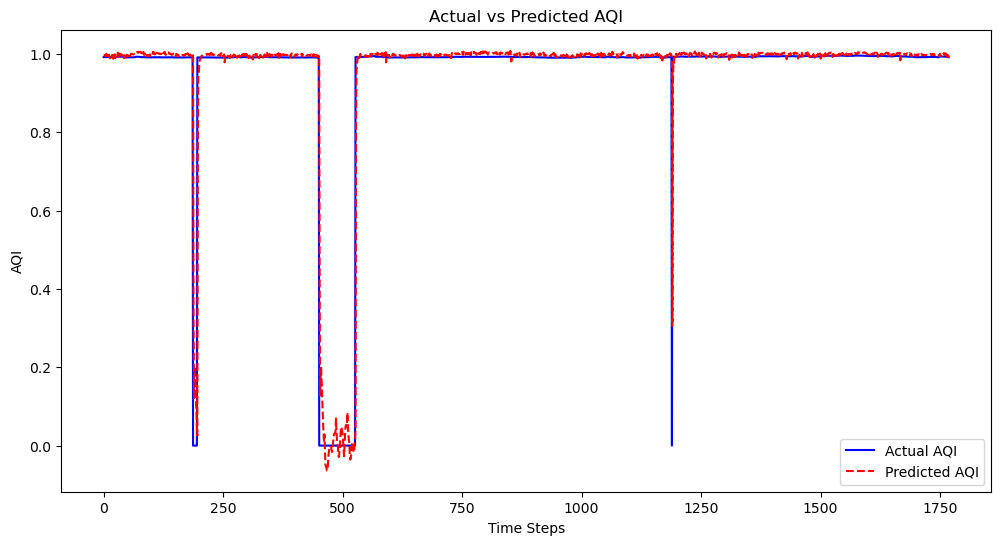

In [403]:
import matplotlib.pyplot as plt

# Predict the AQI values on the validation set
y_val_pred = model.predict(X_val_scaled)

# Inverse transform the scaled predictions and true values to original scale
y_val_pred_original = scaler.inverse_transform(y_val_pred)
y_val_original = scaler.inverse_transform(y_val_scaled)

# Plot actual vs predicted AQI values
plt.figure(figsize=(12, 6))
plt.plot(y_val_original, label="Actual AQI", color='blue')
plt.plot(y_val_pred_original, label="Predicted AQI", color='red', linestyle='dashed')
plt.title("Actual vs Predicted AQI")
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.show()
